In [ ]:
# 내 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Tesserract is an open source text recognition (OCR) Engine
# install tesseract-ocr in Linux
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 43 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,774 kB/s)
Selecting previously unselect

In [ ]:
# install pytessertact using Tesserract in python 
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=cd0aec149d256cc407049adc89691bad4b0b3d5a90485a73492d64b17f955ecd
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract


In [ ]:
# Tesseract 한글 지원을 위해서 Colab에서 GitHub 에 있는 데이터 가져오기
# 다운로드 할 수 있는 URL : https://github.com/tesseract-ocr/tessdata
# Clone Web URL 를 복사해 옵니다.

!git clone https://github.com/tesseract-ocr/tessdata.git

Cloning into 'tessdata'...
remote: Enumerating objects: 759, done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 759
Receiving objects: 100% (759/759), 3.17 GiB | 34.18 MiB/s, done.
Resolving deltas: 100% (172/172), done.
Checking out files: 100% (172/172), done.


In [ ]:
# 한글 지원을 위해 kor.traineddata 파일 복사
!cp tessdata/kor.traineddata ../usr/share/tesseract-ocr/4.00/tessdata/
print('kor.traineddata copy complete!!')

kor.traineddata copy complete!!


In [ ]:
# 다운로드 받았던 파일 제거(선택사항)
!rm -r tessdata

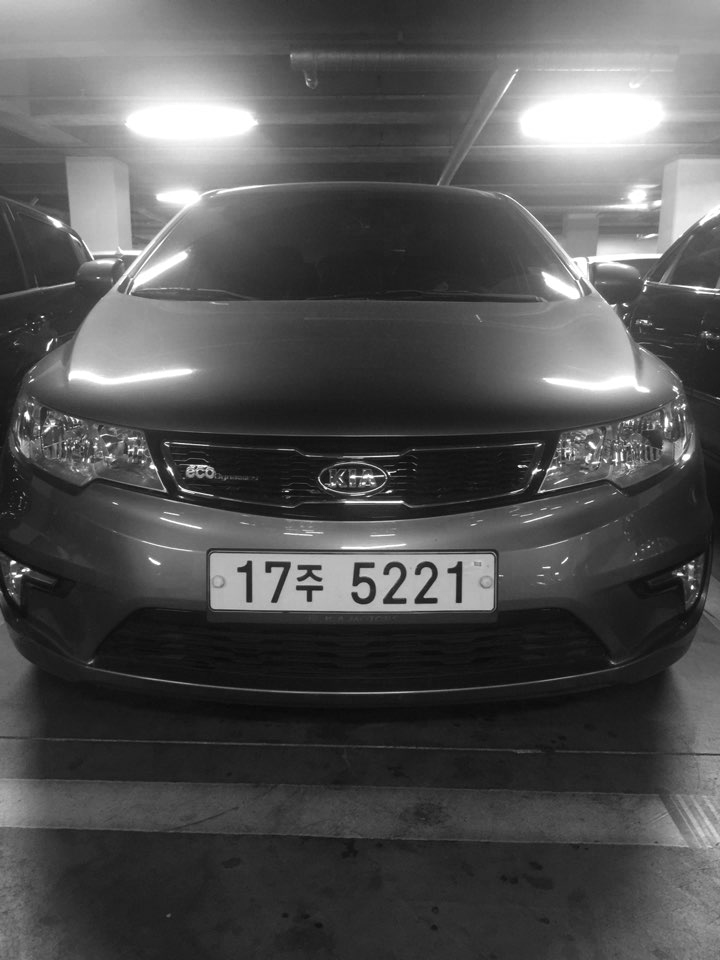

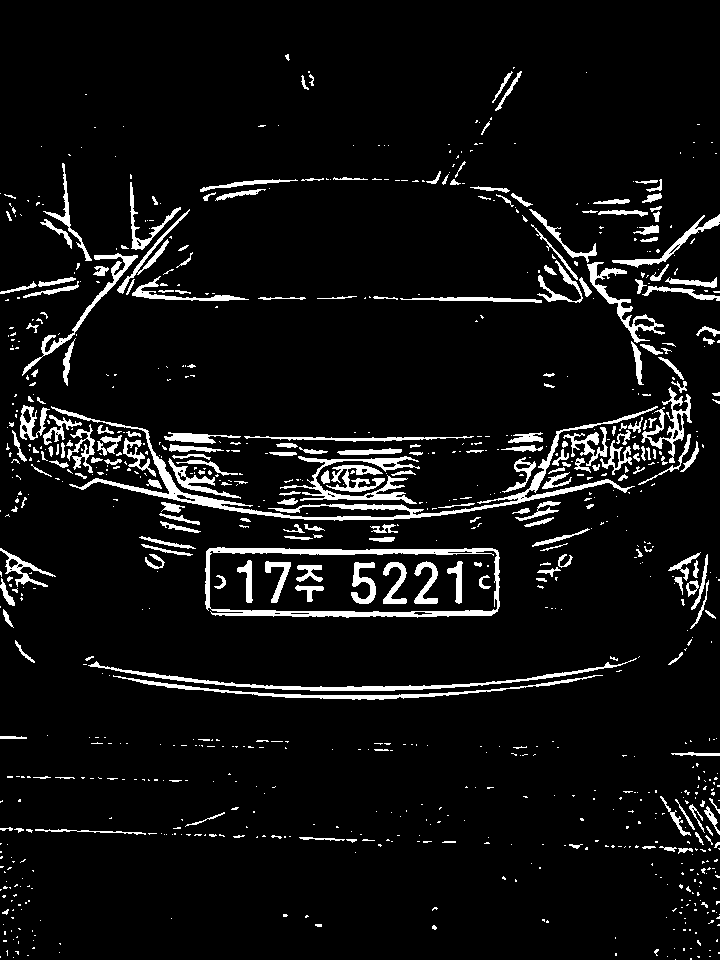

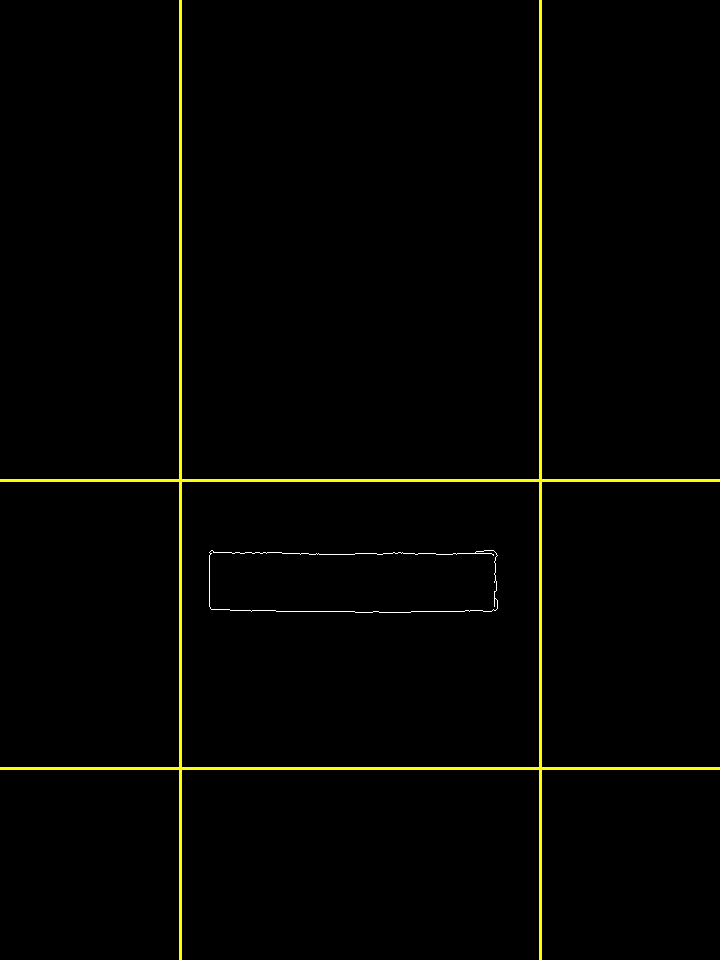

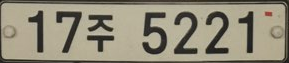



OCR TEXT : -1'7 주 5221

Alpha numeric TEXT : 17주5221



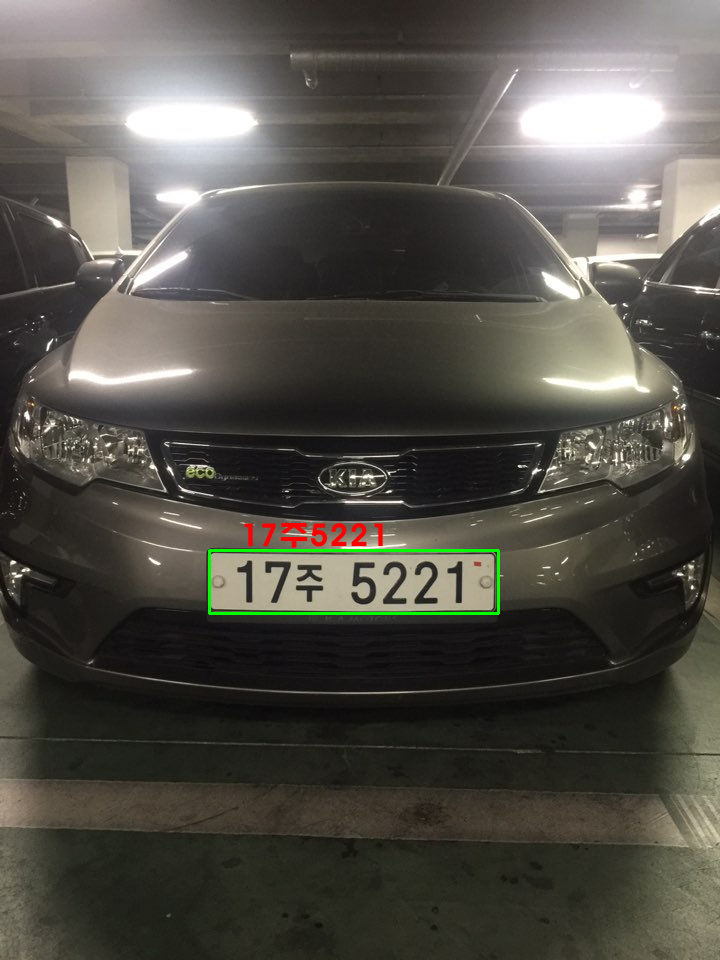

In [ ]:
# 참고
# https://circuitdigest.com/microcontroller-projects/license-plate-recognition-using-raspberry-pi-and-opencv

# 필요한 패키지와 모듈을 불러옴
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pytesseract
from PIL import ImageFont, ImageDraw, Image

margin = 0
file_name = "gdrive/My Drive/CV/License Plate Recognition/image/car4.jpg"  # 원본 이미지 파일

def processROI(image):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # 이미지를 BGR to HSV(HSV filter 적용)
    hue, saturation, value = cv2.split(hsv)     # 색상(hue), 채도(saturation), 명도(value)

    cv2_imshow(value)
    print("\n")

    # morphological operations 을 사용하기 위해 kernel 정의
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  

    # topHat/blackHat operations 적용
    topHat = cv2.morphologyEx(value, cv2.MORPH_TOPHAT, kernel)
    blackHat = cv2.morphologyEx(value, cv2.MORPH_BLACKHAT, kernel)

    # add and subtract between morphological operations
    add = cv2.add(value, topHat)
    subtract = cv2.subtract(add, blackHat)

    # gaussian blur 적용
    blur = cv2.GaussianBlur(subtract, (5, 5), 0)

    # threshold 를 적용
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 19, 9)

    cv2_imshow(thresh)
    print("\n")

    # inverse black plate to white background(검정색 번호판은 흰색 background 로 반전시켜야 함)
    #invert = cv2.bitwise_not(value)
    
    # cv2.findCountours 함수가 OpenCV 버전이 업그레이드 됨에 따라 파라메터 개수에 변동이 있었음.
    # OpenCV 버전4 이상은 파라메터 개수가 2개, OpenCV 버전4 미만은 파라메터 개수가 3개
    cv2MajorVersion = cv2.__version__.split(".")[0]
    # check for contours on thresh
    if int(cv2MajorVersion) >= 4:
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    else:
        imageContours, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    # 위에서 value 이미지(gray)에서 thresh 이미지로 왔기 때문에 채널이 없음
    # thresh 이미지에서 height and width 구함
    height, width = thresh.shape

    # create a numpy array with shape given by threshed image value dimensions
    # 원본 이미지와 동일한 크기의 검정색 이미지(imageContours)를 하나 만든다.
    imageContours = np.zeros((height, width, 3), dtype=np.uint8)

    left_border = int(width * 0.25)    # 세로 왼쪽 선은 width 의 25% 지점
    right_border = int(width * 0.75)   # 세로 오른쪽 선은 width 의 75% 지점
    top_border = int(height * 0.5)     # 가로 위쪽 선은 height 의 50% 지점
    bottom_border = int(height * 0.8)  # 가로 아래쪽 선은 height 의 80% 지점
    cv2.line(imageContours, (0, top_border), (width, top_border), (0, 255, 255), 2)       # 가로 50% 지점에 라인을 그린다.
    cv2.line(imageContours, (0, bottom_border), (width, bottom_border), (0, 255, 255), 2) # 가로 80% 지점에 라인을 그린다.
    cv2.line(imageContours, (left_border, 0), (left_border, height), (0, 255, 255), 2)    # 세로 25% 지점에 라인을 그린다.
    cv2.line(imageContours, (right_border, 0), (right_border, height), (0, 255, 255), 2)  # 세로 75% 지점에 라인을 그린다.
    
    # 번호판 관심 Zone(plateROI) 설정
    plateROI = image[top_border:bottom_border, left_border:right_border]  # 이미지에서 번호판 관심존 위치 좌표를 찾아온다. 
    plateX = left_border   
    plateW = right_border - left_border
    plateY = top_border
    plateH = bottom_border - top_border

    # 찾아온 contours 들 중에서 contourArea descending sorting 해서 Top 10 만 가져온다. 
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    
    # loop to check if any (possible) char is found
    for i in range(0, len(contours)):
        # find four sides and closed figure
        peri = cv2.arcLength(contours[i], True)   # contour가 사각형 모양 인지 확인한다.  
        approx = cv2.approxPolyDP(contours[i], 0.018 * peri, True)  # contour 의 변곡점(꼭지점)의 개수를 찾아낸다.
        boundingRect = cv2.boundingRect(contours[i])  # contour bounding box 좌표를 구한다.
        [x, y, w, h] = boundingRect  
        rectArea = w * h
        if (rectArea > 100 and w > 10 and h > 10 and len(approx) == 4):
            # 검정색 이미지(imageContours)에 자동차 번호판으로 판단되는 contour를 그린다.
            cv2.drawContours(imageContours, contours, i, (255, 255, 255))

            # 번호판 관심 Zone 안에 자동차 번호판으로 판단되는 contour 가 들어 있다면
            # 초기 plateROI 에서 contour 영역으로 자동차 번호판 인식 영역을 좁힌다.
            if (x > left_border and y > top_border and x+w < right_border and y+h < bottom_border):
                plateROI = image[y-margin:y+h+margin, x-margin:x+w+margin]
                plateX = x                                               
                plateW = w 
                plateY = y  
                plateH = h
                break
            
    cv2_imshow(imageContours)
    print("\n")
    cv2_imshow(plateROI)
    print("\n")
    
    return ([plateX, plateY, plateW, plateH], plateROI)  

# Tesseract 옵션 참조
# https://github.com/tesseract-ocr/tesseract/blob/master/doc/tesseract.1.asc

def textRead(image):
    # apply Tesseract v4 to OCR 
    config = ("-l kor --oem 1 --psm 7")   # Tesseract configration 설정
    text = pytesseract.image_to_string(image, config=config)
    # Tesseract에 의해 OCR 된 text 를 Display
    print("OCR TEXT : {}\n".format(text))
    
    # non-ASCII text 제거 
    text = "".join([c if c.isalnum() else "" for c in text]).strip()
    print("Alpha numeric TEXT : {}\n".format(text))
    return text

img = cv2.imread(file_name)  # 이미지를 불러옵니다.
img_copy = img.copy()   # 원본 이미지 copy

([x, y, w, h], process_image) = processROI(img)  # 원본 이미지에서 자동차 번호판 좌표값과 이미지를 가져온다.

text = textRead(process_image)  # 자동차 번호판 이미지에서 text만 가져온다.

cv2.rectangle(img_copy, (x-margin, y-margin), (x+w+margin, y+h+margin), (0, 255, 0), 2)  # 이미지에 boxing

fontpath = "gdrive/My Drive/CV/License Plate Recognition/fonts/HYTBRB.TTF" # 폰트 저장 경로
font = ImageFont.truetype(fontpath, 30)  # 폰트 지정
# 인식한 text(한글)를 이미지에 write
img_pil = Image.fromarray(img_copy)
draw = ImageDraw.Draw(img_pil)
draw.text((x+30, y-margin-30), text, font=font, fill=(0,0,255,0), align ="center")
img_copy = np.array(img_pil)

# show the output image
cv2_imshow(img_copy)